<h1><center>Credit Scoring</center></h1>

In [22]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


## EDA

In [24]:
# Load the dataset
data = pd.read_excel('Base_Final_Final.xlsx', sheet_name='Original')

In [25]:
# Take the first rows to explore the data
data.head()

,REGIONAL,ESTADO CIVIL,# CARGAS,NIVEL DE ESTUDIOS,TIPO DE VIVIENDA,EDAD,SEXO,INGRESOS,EGRESOS,AÑO_CREACION,OCUPACION,TIPO DE GARANTÍA,TIPO DEST.,VALOR ORI.PRESTAM,TASA,CALIFICAC,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
0,1,Casado,2.0,Secundaria,Vive Con Familia,34.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,1.66,156.88,24
1,1,Casado,2.0,Secundaria,Vive Con Familia,34.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,0.00,156.88,24
2,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,1.55,156.88,24
3,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Ama De Casa,Pagaré,CT,3000.0,22.17,A1,1.48,156.88,24
4,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Ama De Casa,Pagaré,CT,3000.0,22.17,A1,1.41,156.88,24


In [26]:
# Describe 
data.describe()

,REGIONAL,# CARGAS,EDAD,INGRESOS,EGRESOS,AÑO_CREACION,VALOR ORI.PRESTAM,TASA,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
count,126863.000000,126700.000000,126710.000000,126863.000000,126863.000000,126863.000000,126863.000000,126863.000000,126848.000000,126863.000000,126863.000000
mean,1.497836,1.221618,42.194507,2905.702100,2044.677671,3.229547,8694.760327,21.366844,20.380611,297.650742,39.381798
std,0.653797,1.000052,13.263097,2315.537261,1980.157729,1.392030,6928.536145,1.001125,79.946904,182.267259,13.022025
min,1.000000,0.000000,20.000000,0.000000,0.000000,1.000000,500.000000,18.500000,0.000000,0.000000,5.000000
25%,1.000000,1.000000,31.000000,1305.000000,593.000000,2.000000,4000.000000,20.600000,2.610000,173.380000,26.000000
50%,1.000000,1.000000,41.000000,2181.140000,1358.000000,3.000000,6000.000000,22.170000,5.420000,249.660000,37.000000
75%,2.000000,2.000000,51.000000,3800.000000,2847.500000,4.000000,10000.000000,22.170000,14.120000,374.140000,48.000000
max,3.000000,6.000000,89.000000,60000.000000,41449.200000,5.000000,40000.000000,24.320000,4754.960000,1750.630000,78.000000


In [27]:
data.isnull().sum() 

REGIONAL                0
ESTADO CIVIL          153
# CARGAS              163
NIVEL DE  ESTUDIOS    163
TIPO DE VIVIENDA        0
EDAD                  153
SEXO                  153
INGRESOS                0
EGRESOS                 0
AÑO_CREACION            0
OCUPACION               0
TIPO DE GARANTÍA        0
TIPO DEST.              0
VALOR ORI.PRESTAM       0
TASA                    0
CALIFICAC               0
OTROS RUBROS DEUDA     15
VALOR CUOTA             0
CUOT_TOT                0
dtype: int64

In [28]:
null_vals_variables = ['ESTADO CIVIL', '# CARGAS', 'NIVEL DE  ESTUDIOS', 'EDAD', 'SEXO', 'OTROS RUBROS DEUDA']

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126710 non-null  object 
 2   # CARGAS            126700 non-null  float64
 3   NIVEL DE  ESTUDIOS  126700 non-null  object 
 4   TIPO DE VIVIENDA    126863 non-null  object 
 5   EDAD                126710 non-null  float64
 6   SEXO                126710 non-null  object 
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  object 
 11  TIPO DE GARANTÍA    126863 non-null  object 
 12  TIPO DEST.          126863 non-null  object 
 13  VALOR ORI.PRESTAM   126863 non-null  float64
 14  TASA                126863 non-null  float64
 15  CALIFICAC           126863 non-nul

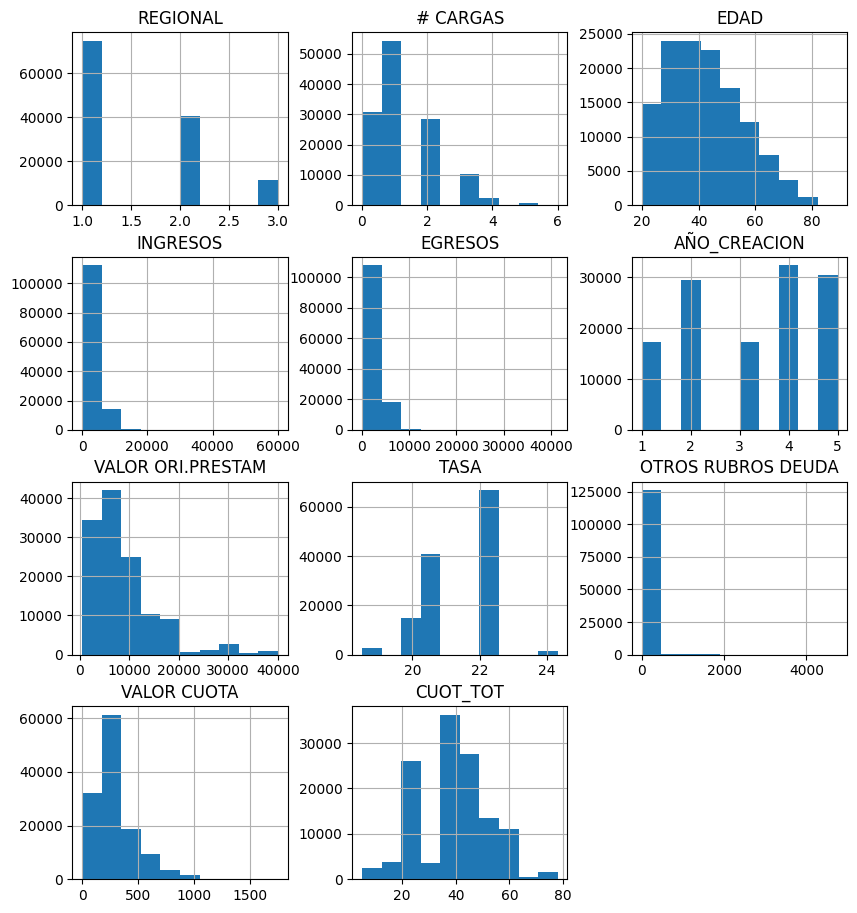

In [30]:
data.hist(grid=True, figsize=(10,11));

In [31]:
print(max(data['INGRESOS']))
print(min(data['INGRESOS']))
print(data['INGRESOS'].mean())

60000.0
0.0
2905.702100488716


In [32]:
variables = data.columns
numeric_variables = data._get_numeric_data().columns
categorical_variables = list(set(variables) - set(numeric_variables))
printmd(f'**Variables in dataset:** {len(variables)}')
printmd(f'**Original quantitative variables:** {len(numeric_variables)}')
print(numeric_variables.to_list())
printmd(f'**Original qualitative variables:** {len(categorical_variables)}')
print(categorical_variables)


**Variables in dataset:** 19

**Original quantitative variables:** 11

['REGIONAL', '# CARGAS', 'EDAD', 'INGRESOS', 'EGRESOS', 'AÑO_CREACION', 'VALOR ORI.PRESTAM', 'TASA', 'OTROS RUBROS DEUDA', 'VALOR CUOTA', 'CUOT_TOT']


**Original qualitative variables:** 8

['NIVEL DE  ESTUDIOS', 'TIPO DE VIVIENDA', 'TIPO DEST.', 'ESTADO CIVIL', 'CALIFICAC', 'OCUPACION', 'TIPO DE GARANTÍA', 'SEXO']


#### Qualitative Variables Encoding

It is time to work with qualitative variables, we can use One Encoder or a Label Encoder, in this case study the
qualitative variables are going to be processed as ordinal variables, because most of them represent an order or hierarchy, so will use Label Encoder with previously defined labels.

In [33]:
#Label encoding for qualitative variables
encoder = ce.OrdinalEncoder(cols=['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION',
                                  'TIPO DE GARANTÍA', 'CALIFICAC', 'NIVEL DE  ESTUDIOS'],
                    return_df=True,
                       mapping=[{
                           'col': 'SEXO',
                           'mapping': {
                               'None': 0,
                               'Femenino': 0,
                               'Masculino': 1
                               }
                           },
                           {
                            'col': 'TIPO DEST.',
                            'mapping':{
                                'None': 0,
                                'AS': 0,
                                'OT': 0,
                                'IF': 1,
                                'II': 1,
                                'CT': 2,
                                'RP': 2,
                                'TE': 3,
                                'TF': 3,
                                'TL': 3,
                                'TO': 3,
                                'TP': 3,
                                'TT': 3
                            }
                           },
                           {
                            'col': 'ESTADO CIVIL',
                            'mapping': {
                                'None': 0,
                                'NA': 0,
                                'Soltero': 0,
                                'Union Libre': 0,
                                'Casado': 1,
                                'Divorciado': 1,
                                'Viudo': 1
                                }
                           },
                           {
                            'col': 'TIPO DE VIVIENDA',
                            'mapping': {
                                'None': 0,
                                'Propia': 0,
                                'Arrendada': 1,
                                'Prestada': 1,
                                'Vive Con Familia': 1
                                }
                           },
                           {
                            'col': 'OCUPACION',
                            'mapping': {
                                'None': 0,
                                'Jubilado': 0,
                                'Acuicultor': 1,
                                'Albañil': 1,
                                'Ama De Casa': 1,
                                'Arrendador': 1,
                                'Artesano': 1,
                                'Barbero': 1,
                                'Carpintero': 1,
                                'Cerrajero ': 1,
                                'Chef / Cocinero Y Afines': 1,
                                'Comerciante': 1,
                                'Conductor / Animador': 1,
                                'Conductor Profesional': 1,
                                'Consultor Profesional': 1,
                                'Consultorias Profesionales': 1,
                                'Contratista': 1,
                                'Cosmetóloga': 1,
                                'Doctor / A': 1,
                                'Electricista': 1,
                                'Estudiante': 1,
                                'Fabricación De Otros Productos De Metal Ncp': 1,
                                'Fabricación de Productos Lácteos': 1,
                                'Faenador / Carnicero': 1,
                                'Ganadero': 1,
                                'Hojalatero': 1,
                                'Horticultor': 1,
                                'Horticultor De Árbol': 1,
                                'Independiente': 1,
                                'Instructor / Capacitador': 1,
                                'Jefe de Área': 1,
                                'Masajista': 1,
                                'Mecánico': 1,
                                'Músico': 1,
                                'Nutricionista': 1,
                                'Panadero / Pastelero': 1,
                                'Peluquero': 1,
                                'Pescador Y Recolector De Productos Del Mar': 1,
                                'Plomero': 1,
                                'Productor De Huevos': 1,
                                'Sastre / Costurera': 1,
                                'Soldador': 1,
                                'Técnico de Audio': 1,
                                'Terapista Y Afines': 1,
                                'Tornero': 1,
                                'Veterinario': 1,
                                'Zapatero': 1,
                                'Analista / Afines': 2,
                                'Asesor Inmobiliario': 2,
                                'Asistentes / Auxiliares /Ayudantes Y Afines': 2,
                                'Atencion Al Cliente': 2,
                                'Bombero': 2,
                                'Cajero': 2,
                                'Conserje / Portero': 2,
                                'Contador': 2,
                                'Despachador / Perchero': 2,
                                'Digitador': 2,
                                'Diseñador Gráfico': 2,
                                'Docente': 2,
                                'Ejecutivo / Afines': 2,
                                'Embasadores / Conservas Y Afines': 2,
                                'Empacador / Cargador': 2,
                                'Empleada Doméstica': 2,
                                'Empleado Privado': 2,
                                'Empleado Público': 2,
                                'Enfermero (A)': 2,
                                'Farmaceuticos  Y Hospitalarios': 2,
                                'Floristería': 2,
                                'Fotografo': 2,
                                'Gerente General': 2,
                                'Guardia de Seguridad': 2,
                                'Jardinero': 2,
                                'Mensajero / Repartidor': 2,
                                'Militar': 2,
                                'Motorista': 2,
                                'Obreros': 2,
                                'Operador De Maquinas De Cultivo / Agricolas': 2,
                                'Otras Actividades De Servicios': 2,
                                'Paramédico': 2,
                                'Periodista': 2,
                                'Policia Nacional': 2,
                                'Publicista': 2,
                                'Quimico Farmaceutico': 2,
                                'Recepcionista / Anfitriona': 2,
                                'Salonero / Barman / Posillero / Similares': 2,
                                'Secretaria / Oficinista': 2,
                                'Subgerencias Y Afines': 2,
                                'Supervisor': 2,
                                'Técnico': 2,
                                'Vendedor / A': 2
                                }
                           },
                           {
                            'col': 'TIPO DE GARANTÍA',
                            'mapping': {
                                'None': 0,
                                'Hipoteca': 0,
                                'Pagaré': 1
                                }
                           },
                           {
                            'col': 'CALIFICAC',
                            'mapping': {
                                'None': 0,
                                'A1': 0,
                                'A2': 0,
                                'A3': 0,
                                'B1': 1,
                                'B2': 1,
                                'C1': 1,
                                'C2': 1,
                                'D': 2,
                                'E': 2,
                                }
                           },
                           {
                            'col': 'NIVEL DE  ESTUDIOS',
                            'mapping': {
                                'None': 0,
                                'NA': 0,
                                'Primaria': 0,
                                'Sin Estudios': 0,
                                'Secundaria': 1,
                                'Técnico': 1,
                                'Postgrado': 2,
                                'Universitaria': 2
                                }
                           },
                       ])

In [34]:
# Encode qualitative variables with defined labels
print(data[['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION', 'TIPO DE GARANTÍA']])
encoded_qualitative_variables = encoder.fit_transform(data[['SEXO', 'TIPO DEST.', 
                                                            'ESTADO CIVIL', 'TIPO DE VIVIENDA',
                                                            'OCUPACION', 'TIPO DE GARANTÍA', 'CALIFICAC', 
                                                            'NIVEL DE  ESTUDIOS']])
print(encoded_qualitative_variables)

             SEXO TIPO DEST. ESTADO CIVIL  TIPO DE VIVIENDA  \
0        Femenino         CT       Casado  Vive Con Familia   
1        Femenino         CT       Casado  Vive Con Familia   
2        Femenino         CT       Casado  Vive Con Familia   
3        Femenino         CT       Casado  Vive Con Familia   
4        Femenino         CT       Casado  Vive Con Familia   
...           ...        ...          ...               ...   
126858  Masculino         TE       Casado            Propia   
126859  Masculino         TE       Casado            Propia   
126860  Masculino         TE       Casado            Propia   
126861  Masculino         TE       Casado            Propia   
126862  Masculino         TE       Casado            Propia   

                    OCUPACION TIPO DE GARANTÍA  
0                    Artesano           Pagaré  
1                    Artesano           Pagaré  
2                    Artesano           Pagaré  
3                 Ama De Casa           Pagaré 

In [35]:
test_range_min = 100
test_range_max = 115
print(data[['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION']][test_range_min:test_range_max])
print(encoded_qualitative_variables[:][test_range_min:test_range_max])

         SEXO TIPO DEST. ESTADO CIVIL TIPO DE VIVIENDA  \
100  Femenino         TE        Viudo           Propia   
101  Femenino         TE        Viudo           Propia   
102  Femenino         TE        Viudo           Propia   
103  Femenino         TE        Viudo           Propia   
104  Femenino         TE        Viudo           Propia   
105  Femenino         TE        Viudo           Propia   
106  Femenino         TE        Viudo           Propia   
107  Femenino         TO      Soltero           Propia   
108  Femenino         TO      Soltero           Propia   
109  Femenino         TO      Soltero           Propia   
110  Femenino         TO      Soltero           Propia   
111  Femenino         TO      Soltero           Propia   
112  Femenino         TO      Soltero           Propia   
113  Femenino         TO      Soltero           Propia   
114  Femenino         TO      Soltero           Propia   

                                       OCUPACION  
100                 

## Data cleaning

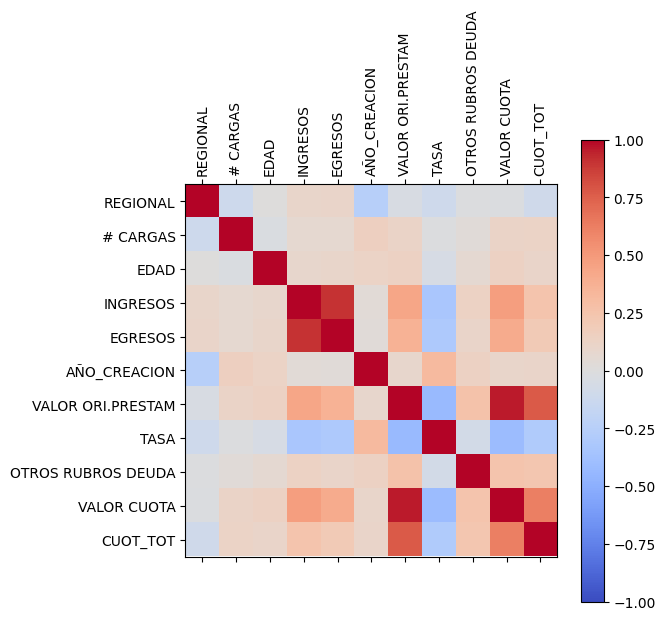

In [36]:
subdata = data[numeric_variables]
corr = subdata.corr(numeric_only=True)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

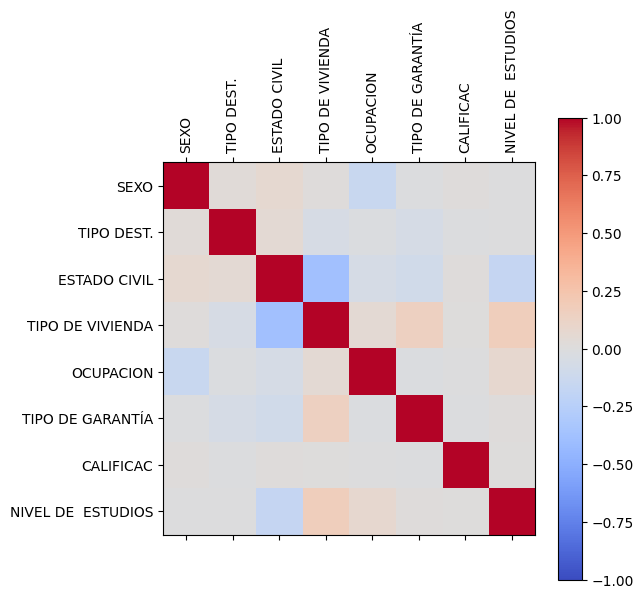

In [37]:
subdata = encoded_qualitative_variables
corr = subdata.corr(numeric_only=True)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

In [38]:
encoded_qualitative_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SEXO                126863 non-null  float64
 1   TIPO DEST.          126863 non-null  int64  
 2   ESTADO CIVIL        126863 non-null  float64
 3   TIPO DE VIVIENDA    126863 non-null  int64  
 4   OCUPACION           126863 non-null  float64
 5   TIPO DE GARANTÍA    126863 non-null  int64  
 6   CALIFICAC           126863 non-null  int64  
 7   NIVEL DE  ESTUDIOS  126863 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 7.7 MB


#### Grouping numeric values by range



In [39]:
# Age encoding
edad = data['EDAD'].copy()

edad[ edad<=35 ] = 0
edad[ (edad>35) & (edad<55) ] = 1
edad[ edad>=55 ] = 2

print(edad)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    1.0
126859    1.0
126860    1.0
126861    1.0
126862    1.0
Name: EDAD, Length: 126863, dtype: float64


In [40]:
# Regional encoding
regional = data['REGIONAL'].copy()
regional[ regional == 1 ] = 0
regional[ regional == 2 ] = 1
regional[ regional == 3 ] = 2
regional

0         0
1         0
2         0
3         0
4         0
         ..
126858    1
126859    1
126860    1
126861    1
126862    1
Name: REGIONAL, Length: 126863, dtype: int64

In [41]:
# CARGAS encoding
cargas = data['# CARGAS'].copy()
cargas[ cargas == 'NA' ] = 0
cargas[ cargas == 0 ] = 0
cargas[ cargas == 1 ] = 1
cargas[ cargas == 2 ] = 1
cargas[ cargas == 3 ] = 1
cargas[ cargas == 4 ] = 1
cargas[ cargas == 5 ] = 1
cargas[ cargas == 6 ] = 1
print(cargas[37:45])

37    0.0
38    0.0
39    0.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
Name: # CARGAS, dtype: float64


In [42]:
# Ingresos encoding
ingresos = data['INGRESOS'].copy()
ingresos[ ingresos < 15000 ] = 0
ingresos[ (ingresos >= 15000) & (ingresos < 30000) ] = 1
ingresos[ (ingresos >= 30000) & (ingresos < 45000) ] = 2
ingresos[ (ingresos >= 45000) & (ingresos <= 60000) ] = 3
ingresos

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    0.0
126859    0.0
126860    0.0
126861    0.0
126862    0.0
Name: INGRESOS, Length: 126863, dtype: float64

In [43]:
# Egresos encoding
egresos = data['EGRESOS'].copy()
egresos[ egresos < 10500 ] = 0
egresos[ (egresos >= 10500) & (egresos < 21000) ] = 1
egresos[ (egresos >= 21000) & (egresos < 31500) ] = 2
egresos[ (egresos >= 31500) & (egresos <= 42000) ] = 3
egresos

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    0.0
126859    0.0
126860    0.0
126861    0.0
126862    0.0
Name: EGRESOS, Length: 126863, dtype: float64

<AxesSubplot: >

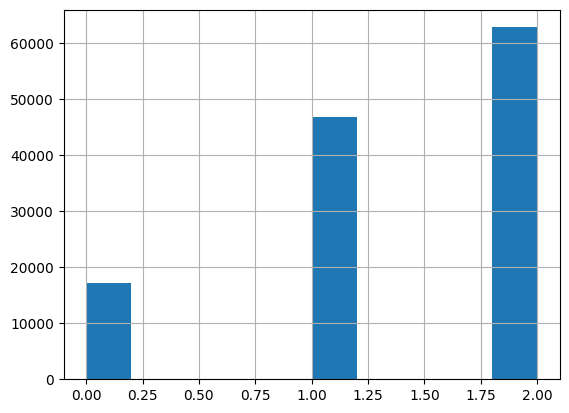

In [44]:
# Año creación encoding
creacion = data['AÑO_CREACION'].copy()
creacion[ creacion == 1 ] = 0
creacion[ (creacion >= 2) & (creacion <= 3)] = 1
creacion[ (creacion >= 4) & (creacion <= 5)] = 2
creacion.hist()

<AxesSubplot: >

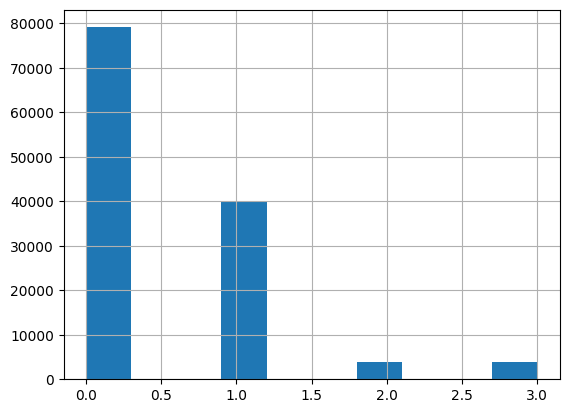

In [45]:
# Valor orig. Prestamo encoding
valor_ori_prestamo = data['VALOR ORI.PRESTAM'].copy()
valor_ori_prestamo[ valor_ori_prestamo < 10000 ] = 0
valor_ori_prestamo[ (valor_ori_prestamo >= 10000) & (valor_ori_prestamo < 20000) ] = 1
valor_ori_prestamo[ (valor_ori_prestamo >= 20000) & (valor_ori_prestamo < 30000) ] = 2
valor_ori_prestamo[ (valor_ori_prestamo >= 30000) & (valor_ori_prestamo <= 40000) ] = 3
valor_ori_prestamo.hist()

<AxesSubplot: >

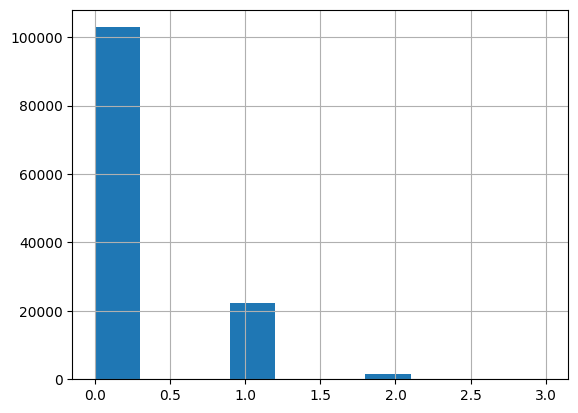

In [46]:
# Valor cuota encoding
valor_cuota = data['VALOR CUOTA'].copy()
valor_cuota[ valor_cuota < 450 ] = 0
valor_cuota[ (valor_cuota >= 450) & (valor_cuota < 900) ] = 1
valor_cuota[ (valor_cuota >= 900) & (valor_cuota < 1350) ] = 2
valor_cuota[ (valor_cuota >= 1350) & (valor_cuota <= 1800) ] = 3
valor_cuota.hist()

<AxesSubplot: >

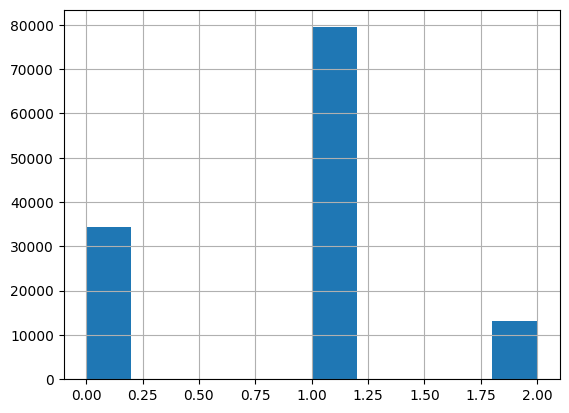

In [47]:
# CUOT_TOT encoding

cuota_total = data['CUOT_TOT'].copy()
cuota_total[ cuota_total < 30 ] = 0
cuota_total[ (cuota_total >= 30) & (cuota_total < 60) ] = 1
cuota_total[ (cuota_total >= 60) & (cuota_total <= 90) ] = 2
cuota_total.hist()

<AxesSubplot: >

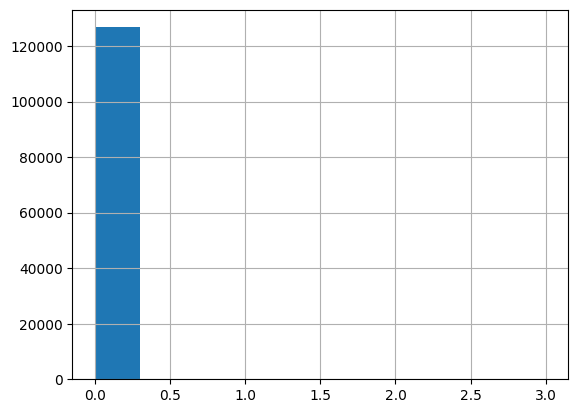

In [48]:
# OTROS RUBROS DEUDA encoding
otros_rubros = data['OTROS RUBROS DEUDA'].copy()
otros_rubros[ otros_rubros < 1250 ] = 0
otros_rubros[ (otros_rubros >= 1250) & (otros_rubros < 2500) ] = 1
otros_rubros[ (otros_rubros >= 2500) & (otros_rubros < 3750) ] = 2
otros_rubros[ (otros_rubros >= 3750) & (otros_rubros <= 5000) ] = 3
otros_rubros.hist()

<AxesSubplot: >

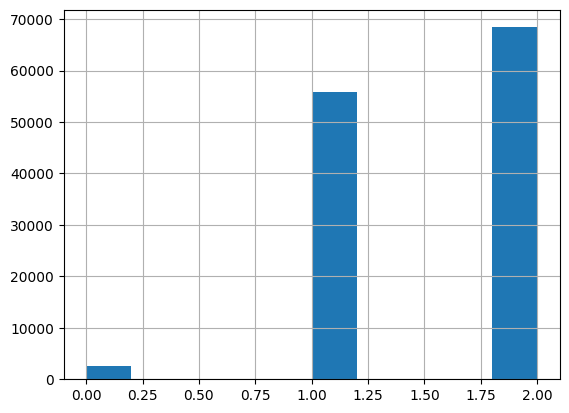

In [49]:
# TASA encoding
tasa = data['TASA'].copy()
tasa[ tasa == 18.50 ] = 0
tasa[ tasa == 19.00 ] = 0
tasa[ tasa == 20.06 ] = 1
tasa[ tasa == 20.60 ] = 1
tasa[ tasa == 21.00 ] = 1
tasa[ tasa == 22.17 ] = 2
tasa[ tasa == 24.32 ] = 2
tasa.hist()

In [50]:
# Replace encoded variables to create the encoded dataset,


# Replace qualitative variables
encoded_dataset = data.copy()
encoded_dataset['SEXO'] = encoded_qualitative_variables['SEXO'] #
encoded_dataset['TIPO DEST.'] = encoded_qualitative_variables['TIPO DEST.'] #
encoded_dataset['ESTADO CIVIL'] = encoded_qualitative_variables['ESTADO CIVIL'] #
encoded_dataset['TIPO DE VIVIENDA'] = encoded_qualitative_variables['TIPO DE VIVIENDA'] #
encoded_dataset['OCUPACION'] = encoded_qualitative_variables['OCUPACION'] #
encoded_dataset['TIPO DE GARANTÍA'] = encoded_qualitative_variables['TIPO DE GARANTÍA'] #
encoded_dataset['CALIFICAC'] = encoded_qualitative_variables['CALIFICAC'] #
encoded_dataset['NIVEL DE  ESTUDIOS'] = encoded_qualitative_variables['NIVEL DE  ESTUDIOS'] #

# Replace gruped numeric values
encoded_dataset['EDAD'] = edad #
encoded_dataset['REGIONAL'] = regional #
encoded_dataset['# CARGAS'] = cargas #
encoded_dataset['INGRESOS'] = ingresos #
encoded_dataset['EGRESOS'] = egresos #
encoded_dataset['AÑO_CREACION'] = creacion #
encoded_dataset['VALOR ORI.PRESTAM'] = valor_ori_prestamo #
encoded_dataset['VALOR CUOTA'] = valor_cuota#
encoded_dataset['CUOT_TOT'] = cuota_total #
encoded_dataset['OTROS RUBROS DEUDA'] = otros_rubros #
encoded_dataset['TASA'] = tasa

encoded_dataset

,REGIONAL,ESTADO CIVIL,# CARGAS,NIVEL DE ESTUDIOS,TIPO DE VIVIENDA,EDAD,SEXO,INGRESOS,EGRESOS,AÑO_CREACION,OCUPACION,TIPO DE GARANTÍA,TIPO DEST.,VALOR ORI.PRESTAM,TASA,CALIFICAC,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
0,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
1,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
2,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
3,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
4,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126858,1,1.0,1.0,1.0,0,1.0,1.0,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126859,1,1.0,1.0,1.0,0,1.0,1.0,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126860,1,1.0,1.0,1.0,0,1.0,1.0,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126861,1,1.0,1.0,1.0,0,1.0,1.0,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1


In [51]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  float64
 2   # CARGAS            126700 non-null  float64
 3   NIVEL DE  ESTUDIOS  126863 non-null  float64
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126710 non-null  float64
 6   SEXO                126863 non-null  float64
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DE GARANTÍA    126863 non-null  int64  
 12  TIPO DEST.          126863 non-null  int64  
 13  VALOR ORI.PRESTAM   126863 non-null  float64
 14  TASA                126863 non-null  float64
 15  CALIFICAC           126863 non-nul

In [55]:
# Replace the missing values with mean
null_vals_variables = ['# CARGAS', 'EDAD', 'OTROS RUBROS DEUDA']
for var in null_vals_variables:
    encoded_dataset[var].fillna(encoded_dataset[var].mean(), inplace=True)
encoded_dataset.isna().sum()

REGIONAL              0
ESTADO CIVIL          0
# CARGAS              0
NIVEL DE  ESTUDIOS    0
TIPO DE VIVIENDA      0
EDAD                  0
SEXO                  0
INGRESOS              0
EGRESOS               0
AÑO_CREACION          0
OCUPACION             0
TIPO DE GARANTÍA      0
TIPO DEST.            0
VALOR ORI.PRESTAM     0
TASA                  0
CALIFICAC             0
OTROS RUBROS DEUDA    0
VALOR CUOTA           0
CUOT_TOT              0
dtype: int64

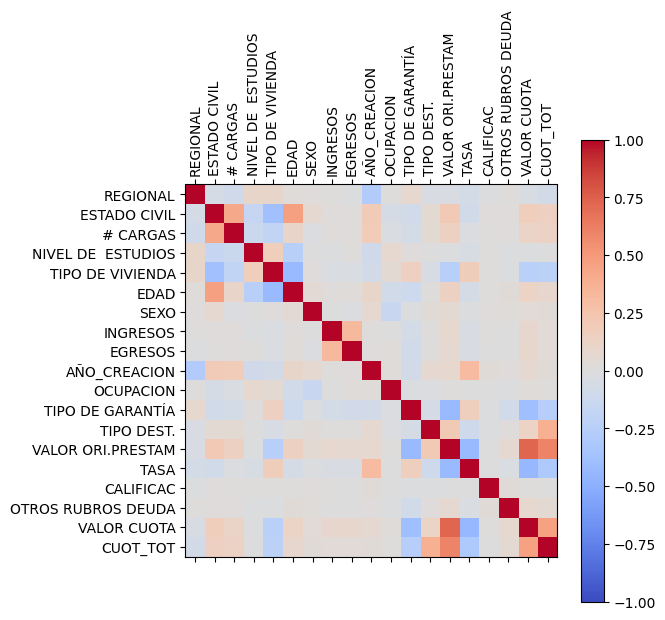

In [53]:
# See correlation of variables after encoding and procesing
subdata = encoded_dataset
corr = subdata.corr()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

In [56]:
# vif
X = encoded_dataset

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

               feature        VIF
0             REGIONAL   1.766371
1         ESTADO CIVIL   3.950314
2             # CARGAS   5.101862
3   NIVEL DE  ESTUDIOS   1.952109
4     TIPO DE VIVIENDA   3.074488
5                 EDAD   3.323162
6                 SEXO   2.234007
7             INGRESOS   1.126554
8              EGRESOS   1.129970
9         AÑO_CREACION   6.327139
10           OCUPACION   7.584038
11    TIPO DE GARANTÍA  23.949429
12          TIPO DEST.  24.276830
13   VALOR ORI.PRESTAM   3.978713
14                TASA  12.193208
15           CALIFICAC   1.003862
16  OTROS RUBROS DEUDA   1.011114
17         VALOR CUOTA   2.709154
18            CUOT_TOT   5.403136


In [57]:
# Drop highly correlated variable

# detectada en correlación de pearson
encoded_dataset.drop('VALOR CUOTA', axis=1, inplace=True)

# detectado con vif
encoded_dataset.drop('TIPO DE GARANTÍA', axis=1, inplace=True)

Al finalizar todo el proceso podemos ver como tenemos un dataset con todas las variables correctamente categorizadas, todas en formato numérico y sin valores faltantes, con esto tenemos nuestro dataset listo para poder continuar con el entrenamiento

In [58]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  float64
 2   # CARGAS            126863 non-null  float64
 3   NIVEL DE  ESTUDIOS  126863 non-null  float64
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  float64
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DEST.          126863 non-null  int64  
 12  VALOR ORI.PRESTAM   126863 non-null  float64
 13  TASA                126863 non-null  float64
 14  CALIFICAC           126863 non-null  int64  
 15  OTROS RUBROS DEUDA  126863 non-nul

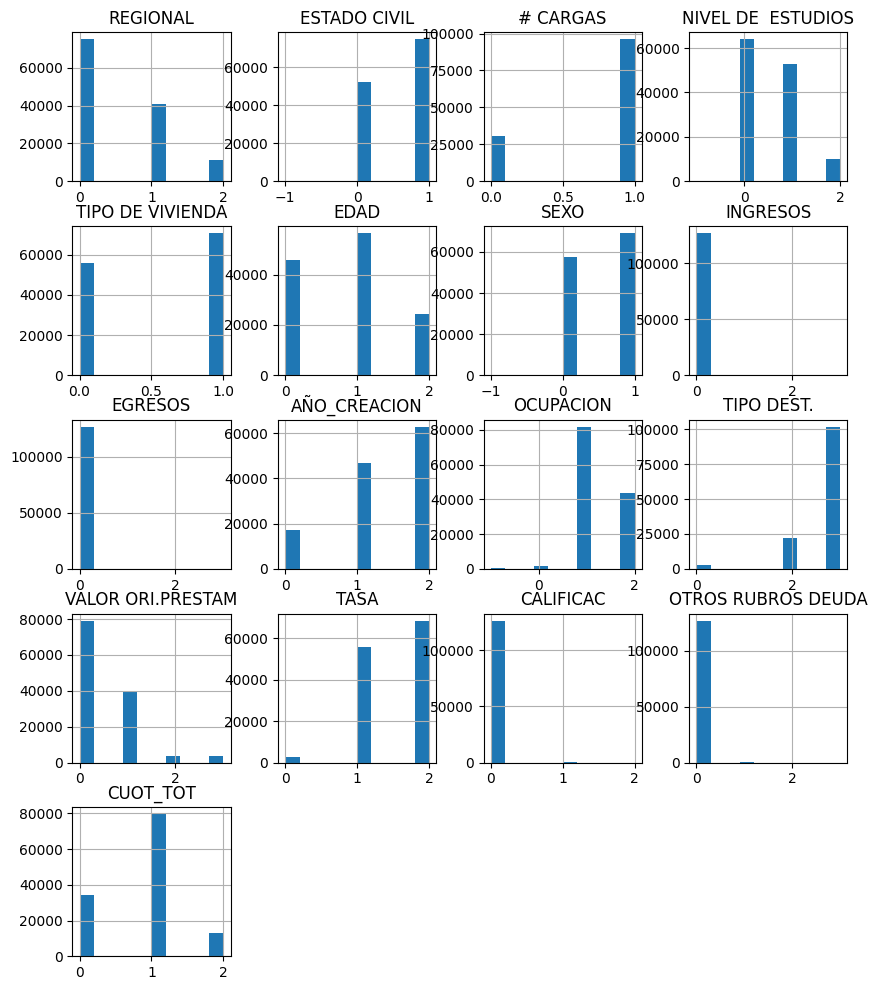

In [59]:
encoded_dataset.hist(grid=True, figsize=(10,12));

In [60]:
# Para poder separar en data de entrenamiento y testeo es necesario que acomodemos la variable objetivo 'CALIFICAC'
temp_calific = encoded_dataset.pop('CALIFICAC')
encoded_dataset.insert(loc=16, column = 'CALIFICAC', value=temp_calific)
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  float64
 2   # CARGAS            126863 non-null  float64
 3   NIVEL DE  ESTUDIOS  126863 non-null  float64
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  float64
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DEST.          126863 non-null  int64  
 12  VALOR ORI.PRESTAM   126863 non-null  float64
 13  TASA                126863 non-null  float64
 14  OTROS RUBROS DEUDA  126863 non-null  float64
 15  CUOT_TOT            126863 non-nul

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379911 entries, 0 to 379910
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            379911 non-null  int64  
 1   ESTADO CIVIL        379911 non-null  float64
 2   # CARGAS            379911 non-null  float64
 3   NIVEL DE  ESTUDIOS  379911 non-null  float64
 4   TIPO DE VIVIENDA    379911 non-null  int64  
 5   EDAD                379911 non-null  float64
 6   SEXO                379911 non-null  float64
 7   INGRESOS            379911 non-null  float64
 8   EGRESOS             379911 non-null  float64
 9   AÑO_CREACION        379911 non-null  int64  
 10  OCUPACION           379911 non-null  float64
 11  TIPO DEST.          379911 non-null  int64  
 12  VALOR ORI.PRESTAM   379911 non-null  float64
 13  TASA                379911 non-null  float64
 14  OTROS RUBROS DEUDA  379911 non-null  float64
 15  CUOT_TOT            379911 non-nul

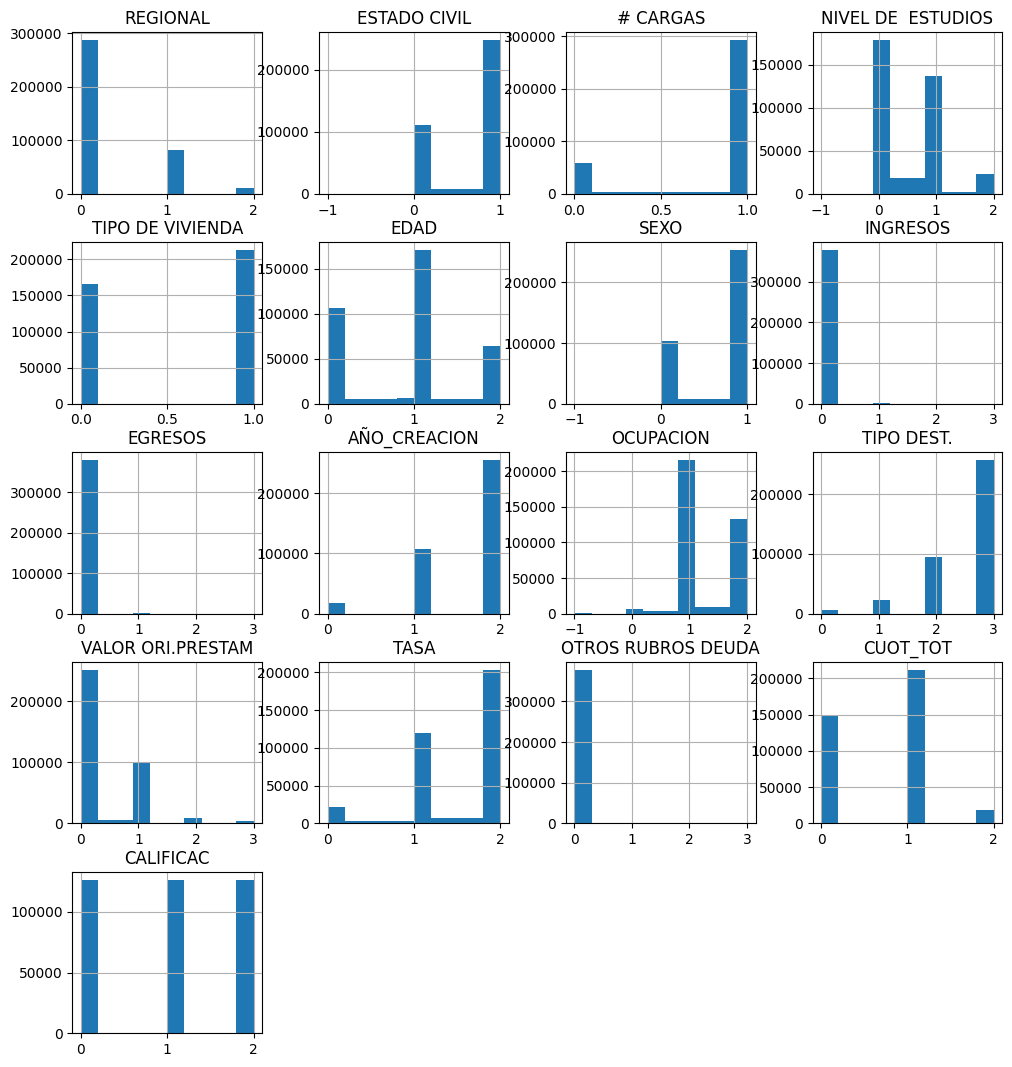

In [61]:
sm = SMOTE(random_state = 2)
x_values = encoded_dataset.iloc[:,0:16]
y_values = encoded_dataset.iloc[:,16]
x_balanced, y_balanced = sm.fit_resample(x_values, y_values)
balanced_dataset = x_balanced.copy()
balanced_dataset['CALIFICAC'] = y_balanced.copy()
balanced_dataset.info()
balanced_dataset.hist(grid=True, figsize=(12,13));

In [63]:
# Split train and test data

train,test=train_test_split(balanced_dataset, train_size=0.8, random_state = 1)
# Tomamos valores X e Y para entrenamiento
x_train = train.values[:,0:16]
y_train = train.values[:,16]
# Tomamos valores X e Y para testing
x_test = test.values[:,0:16]
y_test = test.values[:,16]

print(len(y_train))
len(y_test)

303928


75983

## ANN Modeling

En esta sección se modela y realiza pruebas manuales para determinar una arquitectura base de la red neuronal que se comporte de manera adecuada y coherente para nuestros datos, al ya tener buenos resultados se procederá a realizar la optimización de los hiperparámetros de la red neuronal

In [139]:
# Create model
model = Sequential()
model.add(Dense(16, input_dim=16, activation='selu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18,activation='tanh'))
# model.add(Dense(1,activation='sigmoid')) # for binary clasification
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

epochs = 50
 
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 16)                272       
                                                                 
 dense_41 (Dense)            (None, 18)                306       
                                                                 
 dense_42 (Dense)            (None, 18)                342       
                                                                 
 dense_43 (Dense)            (None, 3)                 57        
                                                                 
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________


In [140]:
# Train model
from keras.utils import np_utils

y_aux = np_utils.to_categorical(y_train)
history = model.fit(x_train, y_aux, epochs=epochs)
 
# Scores the model
scores = model.evaluate(x_train, y_aux)

# Printing results
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(x_train).round())

Epoch 1/50
9498/9498 [==============================] - 4s 364us/step - loss: 0.3835 - accuracy: 0.8357
Epoch 2/50
9498/9498 [==============================] - 4s 372us/step - loss: 0.2663 - accuracy: 0.8959
Epoch 3/50
9498/9498 [==============================] - 3s 365us/step - loss: 0.2314 - accuracy: 0.9117
Epoch 4/50
9498/9498 [==============================] - 3s 358us/step - loss: 0.2076 - accuracy: 0.9222
Epoch 5/50
9498/9498 [==============================] - 3s 361us/step - loss: 0.1932 - accuracy: 0.9288
Epoch 6/50
9498/9498 [==============================] - 4s 457us/step - loss: 0.1856 - accuracy: 0.9322
Epoch 7/50
9498/9498 [==============================] - 4s 373us/step - loss: 0.1819 - accuracy: 0.9338
Epoch 8/50
9498/9498 [==============================] - 3s 365us/step - loss: 0.1802 - accuracy: 0.9347
Epoch 9/50
9498/9498 [==============================] - 3s 359us/step - loss: 0.1784 - accuracy: 0.9356
Epoch 10/50
9498/9498 [==============================] - 4s 413u

In [141]:
y_aux

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

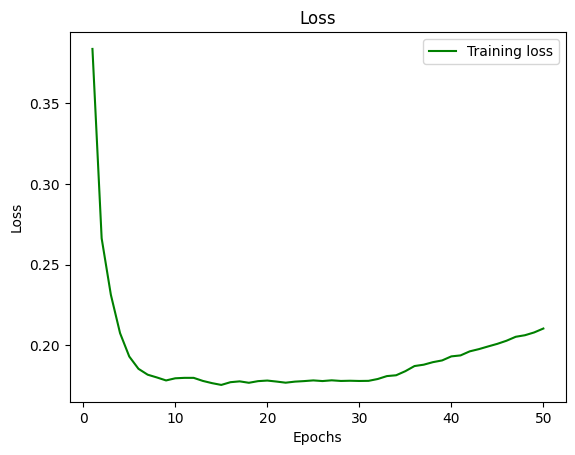

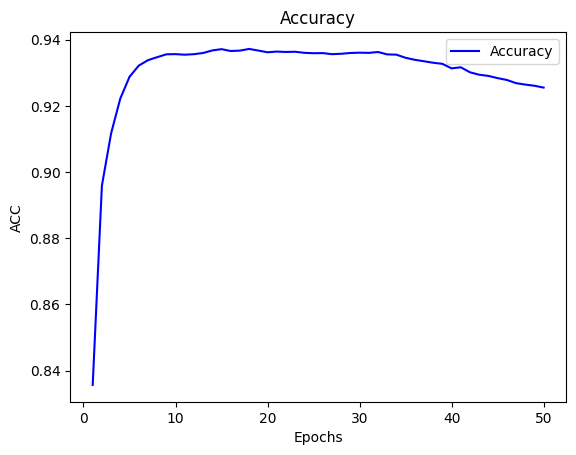

In [142]:
# Getting training metrics

# Gráfica de loss vs epochs
loss_train = history.history['loss']
acc = history.history['accuracy']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_train, 'g', label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica de acc vs epochs
plt.plot(epochs_range, acc, 'b', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

In [98]:
# Predictions and model evaluation

# test
y_pred_test = model.predict(x_test)
# redondeamos las predicciones
#rounded_y_pred_test = [round(x[0]) for x in y_pred_test] # for binary
y_classes = y_pred_test.argmax(axis=-1)
scores_test = model.evaluate(x_test, np_utils.to_categorical(y_test))
print("Accuracy con test: \n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))#Accuracy (exactitud)

2375/2375 [==============================] - 1s 307us/step - loss: 0.1146 - accuracy: 0.9590
Accuracy con test: 
accuracy: 95.90%


In [99]:
y_pred_test

y_classes = y_pred_test.argmax(axis=-1)
y_classes

array([0, 2, 2, ..., 2, 0, 1])

In [100]:
print(y_classes)
print(len(y_classes))

[0 2 2 ... 2 0 1]
75983


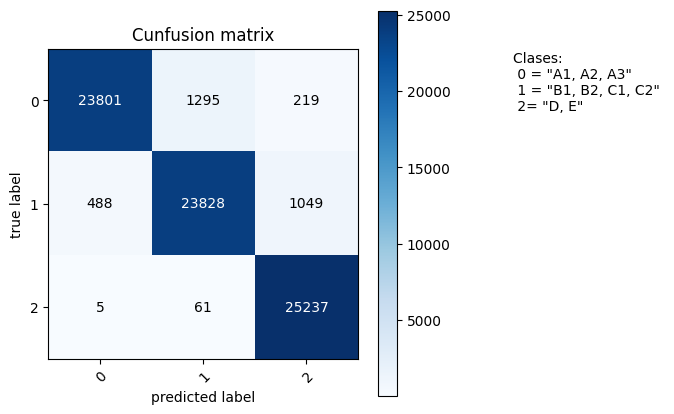

In [101]:
labels=[0, 1, 2]
title = 'Cunfusion matrix'

confMatrix = confusion_matrix(y_test, y_classes, labels=labels)

fig, ax = plot_confusion_matrix(confMatrix, 
                      class_names=labels,
                      colorbar=True,
                                figsize=(5,5)
                      )
ax.annotate(f'Clases: \n 0 = "A1, A2, A3" \n 1 = "B1, B2, C1, C2" \n 2= "D, E"', 
            xy = (1.5, 0.8), 
            xycoords='axes fraction')

plt.title(f'{title}')
#fig.tight_layout()
plt.show()


## ANN optimization

In [102]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [111]:
def create_model(init_mode='uniform', optimizer='adam'):
    # define model
    model = Sequential()
    model.add(Dense(16, input_dim=16, activation='selu', kernel_initializer=init_mode))
    model.add(Dense(18, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(18,activation='tanh', kernel_initializer=init_mode))
    model.add(Dense(3, activation='softmax', kernel_initializer=init_mode))
    # compile model
    model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    return model

In [113]:
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 15

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)

# define the grid search parameters

# init mode for initial neurons weight
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 
             'he_normal', 'he_uniform']

# optimizers
optimizer = ['rmsprop','adam']

param_grid = dict(init_mode=init_mode, optimizer=optimizer)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

/var/folders/vk/jvp91hqs0_b948m658jpp7680000gn/T/ipykernel_13353/467923242.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_CV = KerasClassifier(build_fn=create_model, epochs=epochs,


Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.5355 - accuracy: 0.7573
Epoch 2/15
1583/1583 [==============================] - 3s 1ms/step - loss: 0.6836 - accuracy: 0.6871
Epoch 2/15
1583/1583 [==============================] - 3s 1ms/step - loss: 0.7483 - accuracy: 0.6599
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.6879 - accuracy: 0.6898
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.7009 - accuracy: 0.6816
Epoch 2/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.3702 - accuracy: 0.8370
Epoch 3/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.4915 - accuracy: 0.7790
Epoch 3/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.4982 - accuracy: 0.7849
Epoch 3/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.4840 - accuracy: 0.7829
Epoch 3/15
   1/1583 [.....

2023-04-15 23:59:24.475549: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 589/1583 [==========>...................] - ETA: 1s - loss: 0.4339 - accuracy: 0.7991

2023-04-15 23:59:25.510595: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1583/1583 [==============================] - 2s 1ms/step - loss: 0.3229 - accuracy: 0.8651
Epoch 4/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.4170 - accuracy: 0.8112
Epoch 4/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.4447 - accuracy: 0.7972
Epoch 4/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.4172 - accuracy: 0.8077
Epoch 4/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.4394 - accuracy: 0.8012
Epoch 4/15
1583/1583 [==============================] - 3s 1ms/step - loss: 0.5510 - accuracy: 0.7582
Epoch 2/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.2902 - accuracy: 0.8834
Epoch 5/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.3821 - accuracy: 0.8267
Epoch 5/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.3943 - accuracy: 0.8199
Epoch 5/15
1583/1583 [==============================] - 3s 1ms/step - loss: 0.7183 - accuracy

1583/1583 [==============================] - 3s 2ms/step - loss: 0.2699 - accuracy: 0.8871
Epoch 12/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2713 - accuracy: 0.8922
Epoch 13/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.8937
Epoch 13/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2876 - accuracy: 0.8810
Epoch 10/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9018
Epoch 13/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.1863 - accuracy: 0.9316
Epoch 14/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2006 - accuracy: 0.9263
Epoch 11/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2434 - accuracy: 0.9061
Epoch 13/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2590 - accuracy: 0.8932
Epoch 13/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.2639 -

1583/1583 [==============================] - 3s 2ms/step - loss: 0.3712 - accuracy: 0.8327
Epoch 5/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.4906 - accuracy: 0.7751
Epoch 3/15
1583/1583 [==============================] - 4s 3ms/step - loss: 0.2677 - accuracy: 0.8956
Epoch 5/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.2503 - accuracy: 0.9027
Epoch 6/15
1583/1583 [==============================] - 4s 3ms/step - loss: 0.4191 - accuracy: 0.8090
Epoch 4/15
1583/1583 [==============================] - 5s 3ms/step - loss: 0.2362 - accuracy: 0.9108
Epoch 6/15
1583/1583 [==============================] - 5s 3ms/step - loss: 0.2591 - accuracy: 0.8998
Epoch 6/15
  95/1583 [>.............................] - ETA: 3s - loss: 0.2528 - accuracy: 0.9000Epoch 3/15
Epoch 6/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.2513 - accuracy: 0.9030
Epoch 6/15
1583/1583 [==============================] - 4s 3ms/step - loss: 0.4329 - ac

1583/1583 [==============================] - 2s 2ms/step - loss: 0.2572 - accuracy: 0.8989
Epoch 12/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2336 - accuracy: 0.9100
Epoch 11/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.1784 - accuracy: 0.9353
Epoch 14/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2403 - accuracy: 0.9067
Epoch 15/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.2471 - accuracy: 0.9034
Epoch 13/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.1743 - accuracy: 0.9376
Epoch 15/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.1777 - accuracy: 0.9358
Epoch 15/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.2385 - accuracy: 0.9074
Epoch 14/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.2480 - accuracy: 0.9009
Epoch 15/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2220 -

1583/1583 [==============================] - 2s 1ms/step - loss: 1.0986 - accuracy: 0.3330
Epoch 5/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.2936 - accuracy: 0.8791
Epoch 7/15
1583/1583 [==============================] - 2s 1ms/step - loss: 1.0986 - accuracy: 0.3326
Epoch 7/15
1583/1583 [==============================] - 2s 1ms/step - loss: 1.0987 - accuracy: 0.3326
Epoch 6/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.3111 - accuracy: 0.8695
Epoch 7/15
1583/1583 [==============================] - 2s 2ms/step - loss: 1.0986 - accuracy: 0.3337
Epoch 6/15
1583/1583 [==============================] - 2s 1ms/step - loss: 1.0987 - accuracy: 0.3329
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2762 - accuracy: 0.8861
Epoch 8/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.2952 - accuracy: 0.8772
Epoch 8/15
1583/1583 [==============================] - 2s 1ms/step - loss: 1.0987 - accuracy

  1/792 [..............................] - ETA: 3:47 - loss: 1.0991 - accuracy: 0.2734Epoch 1/15
Epoch 1/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.3347
Epoch 15/15
 527/1583 [========>.....................] - ETA: 2s - loss: 1.0986 - accuracy: 0.3317Epoch 1/15
Epoch 1/15
1583/1583 [==============================] - 5s 2ms/step - loss: 1.0986 - accuracy: 0.3334
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5524 - accuracy: 0.7588
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5250 - accuracy: 0.7707
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.3321
Epoch 14/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5303 - accuracy: 0.7690
Epoch 2/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.3861 - accuracy: 0.8280
Epoch 3/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5

1583/1583 [==============================] - 2s 2ms/step - loss: 0.2347 - accuracy: 0.9115
Epoch 9/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.3322
Epoch 9/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2270 - accuracy: 0.9133
Epoch 8/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2354 - accuracy: 0.9100
Epoch 9/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2773 - accuracy: 0.8909
Epoch 5/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2068 - accuracy: 0.9231
Epoch 8/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2128 - accuracy: 0.9228
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2347 - accuracy: 0.9117
Epoch 10/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2271 - accuracy: 0.9155
Epoch 10/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0986 - accura

1583/1583 [==============================] - 3s 2ms/step - loss: 0.1848 - accuracy: 0.9331
Epoch 13/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5834 - accuracy: 0.7444
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1694 - accuracy: 0.9399
Epoch 15/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.5413 - accuracy: 0.7675
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.5127 - accuracy: 0.7823
Epoch 2/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.3274 - accuracy: 0.8704
Epoch 3/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.3117 - accuracy: 0.8750
Epoch 4/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5551 - accuracy: 0.7549
Epoch 2/15
1583/1583 [==============================] - 3s 1ms/step - loss: 0.5491 - accuracy: 0.7682
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2858 - accura

1583/1583 [==============================] - 3s 2ms/step - loss: 0.1909 - accuracy: 0.9310
Epoch 10/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1916 - accuracy: 0.9316
Epoch 9/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2526 - accuracy: 0.9037
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2128 - accuracy: 0.9211
Epoch 8/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2217 - accuracy: 0.9151
Epoch 8/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2048 - accuracy: 0.9240
Epoch 11/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2752 - accuracy: 0.8901
Epoch 6/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1830 - accuracy: 0.9342
Epoch 11/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1834 - accuracy: 0.9351
Epoch 10/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1892 - accu

1583/1583 [==============================] - 4s 2ms/step - loss: 0.5515 - accuracy: 0.7549
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5012 - accuracy: 0.7878
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2658 - accuracy: 0.8964
Epoch 4/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3508 - accuracy: 0.8498
Epoch 3/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.3082 - accuracy: 0.8716
Epoch 3/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5223 - accuracy: 0.7607
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.8814
Epoch 4/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3397 - accuracy: 0.8633
Epoch 3/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9010
Epoch 4/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2230 - accuracy

1583/1583 [==============================] - 3s 2ms/step - loss: 0.2232 - accuracy: 0.9156
Epoch 9/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1767 - accuracy: 0.9366
Epoch 10/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1804 - accuracy: 0.9351
Epoch 12/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2001 - accuracy: 0.9259
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1727 - accuracy: 0.9367
Epoch 12/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2006 - accuracy: 0.9240
Epoch 9/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1995 - accuracy: 0.9285
Epoch 11/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2152 - accuracy: 0.9198
Epoch 10/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2275 - accuracy: 0.9180
Epoch 10/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1721 - ac

1583/1583 [==============================] - 1s 536us/step - loss: 0.1713 - accuracy: 0.9381
Epoch 14/15
1583/1583 [==============================] - 1s 462us/step - loss: 0.1677 - accuracy: 0.9390
Epoch 15/15
792/792 [==============================] - 1s 340us/step - loss: 0.1659 - accuracy: 0.9386
Epoch 1/15
2375/2375 [==============================] - 1s 473us/step - loss: 0.4403 - accuracy: 0.8125
Epoch 2/15
2375/2375 [==============================] - 1s 497us/step - loss: 0.2860 - accuracy: 0.8866
Epoch 3/15
2375/2375 [==============================] - 1s 469us/step - loss: 0.2404 - accuracy: 0.9073
Epoch 4/15
2375/2375 [==============================] - 1s 459us/step - loss: 0.2090 - accuracy: 0.9225
Epoch 5/15
2375/2375 [==============================] - 1s 485us/step - loss: 0.1892 - accuracy: 0.9308
Epoch 6/15
2375/2375 [==============================] - 1s 469us/step - loss: 0.1758 - accuracy: 0.9362
Epoch 7/15
2375/2375 [==============================] - 1s 481us/step - los

In [126]:
printmd(f'**Mejor accuracy obtenido: {round(grid_result.best_score_,3)}**')
printmd(f'**Parámetros optimos: {grid_result.best_params_}**')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

**Mejor accuracy obtenido: 0.941**

**Parámetros optimos: {'init_mode': 'glorot_uniform', 'optimizer': 'adam'}**

 mean=0.9049, std=0.003712 using {'init_mode': 'uniform', 'optimizer': 'rmsprop'}
 mean=0.9132, std=0.004646 using {'init_mode': 'uniform', 'optimizer': 'adam'}
 mean=0.9371, std=0.002189 using {'init_mode': 'lecun_uniform', 'optimizer': 'rmsprop'}
 mean=0.9405, std=0.0002283 using {'init_mode': 'lecun_uniform', 'optimizer': 'adam'}
 mean=0.9106, std=0.005203 using {'init_mode': 'normal', 'optimizer': 'rmsprop'}
 mean=0.9224, std=0.004847 using {'init_mode': 'normal', 'optimizer': 'adam'}
 mean=0.3326, std=0.0007108 using {'init_mode': 'zero', 'optimizer': 'rmsprop'}
 mean=0.3323, std=0.0005794 using {'init_mode': 'zero', 'optimizer': 'adam'}
 mean=0.9319, std=0.002598 using {'init_mode': 'glorot_normal', 'optimizer': 'rmsprop'}
 mean=0.9402, std=0.001642 using {'init_mode': 'glorot_normal', 'optimizer': 'adam'}
 mean=0.9385, std=0.00174 using {'init_mode': 'glorot_uniform', 'optimizer': 'rmsprop'}
 mean=0.941, std=0.004147 using {'init_mode': 'glorot_uniform', 'optimizer': 'adam'}
 me

Tras haber realizado la pruebas se procede a realizar la construcción del modelo final con los hiperparámetros mejor valorados

In [128]:
final_model = create_model(init_mode='glorot_uniform', optimizer='adam')
final_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                272       
                                                                 
 dense_37 (Dense)            (None, 18)                306       
                                                                 
 dense_38 (Dense)            (None, 18)                342       
                                                                 
 dense_39 (Dense)            (None, 3)                 57        
                                                                 
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________


In [133]:
epochs = 50
model = final_model

y_aux = np_utils.to_categorical(y_train)
history = model.fit(x_train, y_aux, epochs=epochs)
 
# Scores the model
scores = model.evaluate(x_train, y_aux)

# Printing results
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(x_train).round())

Epoch 1/50
9498/9498 [==============================] - 4s 438us/step - loss: 0.3979 - accuracy: 0.8248
Epoch 2/50
9498/9498 [==============================] - 4s 448us/step - loss: 0.2746 - accuracy: 0.8895
Epoch 3/50
9498/9498 [==============================] - 4s 435us/step - loss: 0.2311 - accuracy: 0.9118
Epoch 4/50
9498/9498 [==============================] - 4s 441us/step - loss: 0.2076 - accuracy: 0.9231
Epoch 5/50
9498/9498 [==============================] - 4s 438us/step - loss: 0.1921 - accuracy: 0.9297
Epoch 6/50
9498/9498 [==============================] - 4s 439us/step - loss: 0.1783 - accuracy: 0.9349
Epoch 7/50
9498/9498 [==============================] - 4s 431us/step - loss: 0.1681 - accuracy: 0.9391
Epoch 8/50
9498/9498 [==============================] - 4s 436us/step - loss: 0.1601 - accuracy: 0.9423
Epoch 9/50
9498/9498 [==============================] - 4s 447us/step - loss: 0.1548 - accuracy: 0.9442
Epoch 10/50
9498/9498 [==============================] - 4s 433u

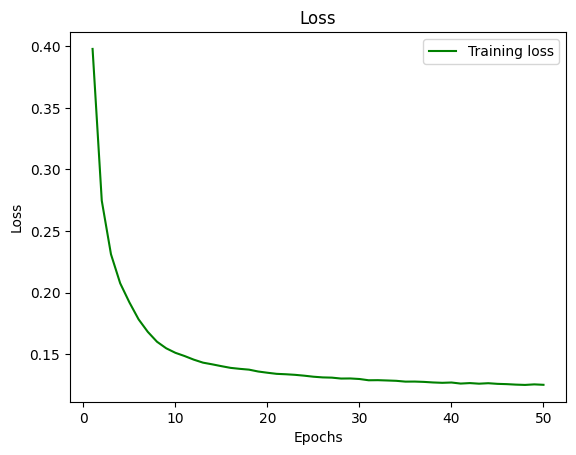

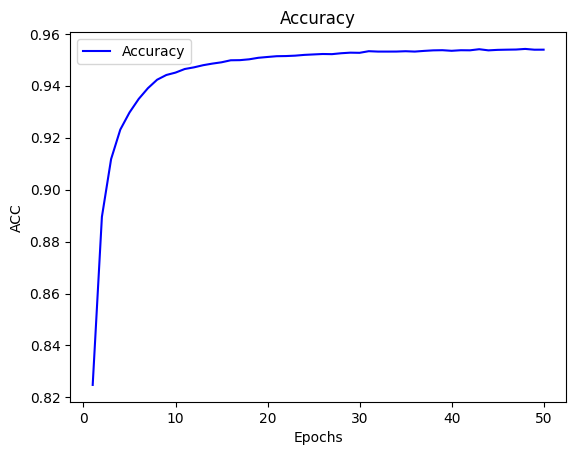

In [134]:
# Getting training metrics

# Gráfica de loss vs epochs
loss_train = history.history['loss']
acc = history.history['accuracy']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_train, 'g', label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica de acc vs epochs
plt.plot(epochs_range, acc, 'b', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

## Resultados

Tras obtener el entrenamiento final con sus resultados en el conjunto de test podemos procedemos a visualizar la arquitectura final del modelo

In [137]:
# Plotting ANN architecture
from ann_visualizer.visualize import ann_viz
from IPython.display import IFrame

ann_viz(final_model, view=True, filename='construct_model', title='ANN_Simple_Architecture')
IFrame("./construct_model.pdf", width=980, height=400)


Accuracy en los datos de testing para el modelo final

In [135]:
# Predictions and model evaluation in test set

# test
y_pred_test = model.predict(x_test)
# redondeamos las predicciones
#rounded_y_pred_test = [round(x[0]) for x in y_pred_test] # for binary
y_classes = y_pred_test.argmax(axis=-1)
scores_test = model.evaluate(x_test, np_utils.to_categorical(y_test))
print("Accuracy con test: \n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))#Accuracy (exactitud)

2375/2375 [==============================] - 1s 299us/step - loss: 0.1207 - accuracy: 0.9563
Accuracy con test: 
accuracy: 95.63%


Matriz de confusión para el modelo final para observar su exactitud

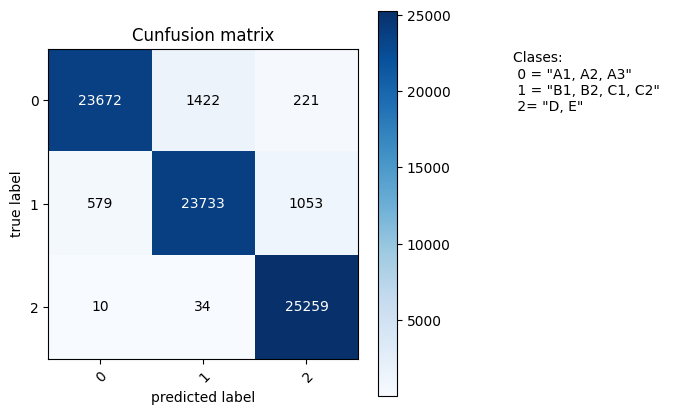

In [136]:
labels=[0, 1, 2]
title = 'Cunfusion matrix'

confMatrix = confusion_matrix(y_test, y_classes, labels=labels)

fig, ax = plot_confusion_matrix(confMatrix, 
                      class_names=labels,
                      colorbar=True,
                                figsize=(5,5)
                      )
ax.annotate(f'Clases: \n 0 = "A1, A2, A3" \n 1 = "B1, B2, C1, C2" \n 2= "D, E"', 
            xy = (1.5, 0.8), 
            xycoords='axes fraction')

plt.title(f'{title}')
#fig.tight_layout()
plt.show()